# Part 2: Working with code #
Jupyter notebooks have amazing features to include text and images and create beautiful, human readable documents as you've just seen. But their main benefit is working with code. Now we're going to import a few libraries and start experimenting with Python code. We've already done the simple 2 + 2 before, so let's do something a little bit more interesting. First, we need to import numpy and matplotlib:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Notebooks.ai include all the most popular Data Science and Deep Learning libraries already installed. And even if there's one missing, you can always install it in your own environment (more on that later). We've just imported these two libraries:

    numpy the most popular Python library for array manipulation and numeric computing
    matplotlib the most popular visualization library in the Python ecosystem.

Let's now execute a few lines of code and generate some plots:

In [2]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

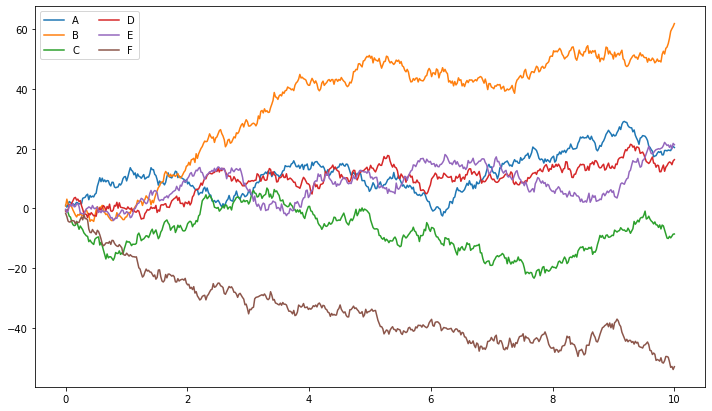

In [3]:
plt.figure(figsize=(12, 7))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

# Part 3: Interacting with data

Notebooks.ai and Jupyter Lab make it really simple to intereact with files in your local storage. These files are securely stored in the cloud and you can access them from anywhere in the world.

To show you the full potential of Notebooks.ai, we're going to pull cryptocurrencies prices from a public API and download them as Excel files, pretty fancy 😎. I need to import two libraries first: requests (to pull data from the web) and pandas to process it.

In [6]:
import requests
import pandas as pd

I have a predefined function that simplifies the process of importing data from Cryptowatch (for reference, check their docs).

In [7]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

I will now pull data from Bitcoin and Ether, two of the most popular cryptocurrencies, for the last 7 days:

compute Time difference

In [13]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2020-09-23 20:53:28.701438')

In [14]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [15]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

### Bitcoin:

In [16]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2020-09-23 21:00:00,10280.62,10325.00,10138.30,10223.80,981.277784,1.004489e+07
2020-09-23 22:00:00,10225.00,10280.08,10206.06,10251.75,320.403304,3.283697e+06
2020-09-23 23:00:00,10248.68,10293.00,10242.21,10269.23,263.230798,2.702141e+06
2020-09-24 00:00:00,10263.58,10264.22,10206.82,10233.42,112.171939,1.147974e+06
2020-09-24 01:00:00,10236.86,10297.12,10193.20,10289.54,296.974465,3.047028e+06


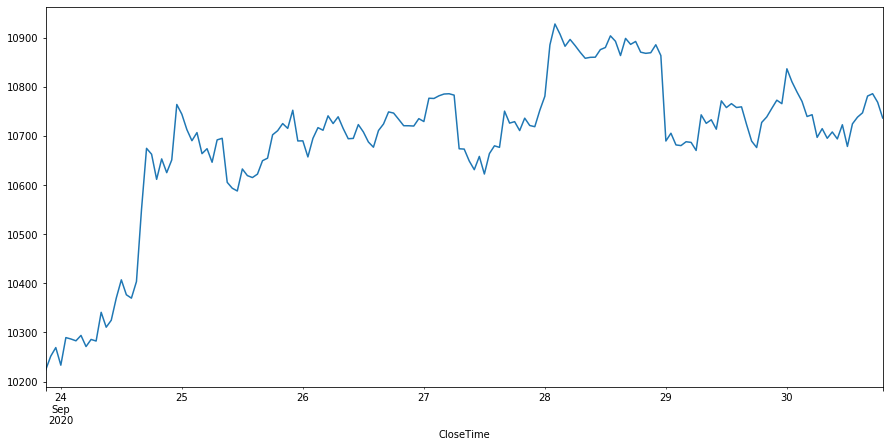

In [17]:
btc['ClosePrice'].plot(figsize=(15, 7))

### Ether:

In [18]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2020-09-23 21:00:00,327.40,329.24,313.00,322.53,7534.291901,2.417923e+06
2020-09-23 22:00:00,322.95,327.27,320.34,323.76,3417.282971,1.105142e+06
2020-09-23 23:00:00,322.32,323.91,320.90,323.78,4571.068379,1.474166e+06
2020-09-24 00:00:00,323.87,323.87,318.48,320.17,2638.781675,8.464479e+05
2020-09-24 01:00:00,320.58,323.23,316.83,322.52,2302.100948,7.398136e+05


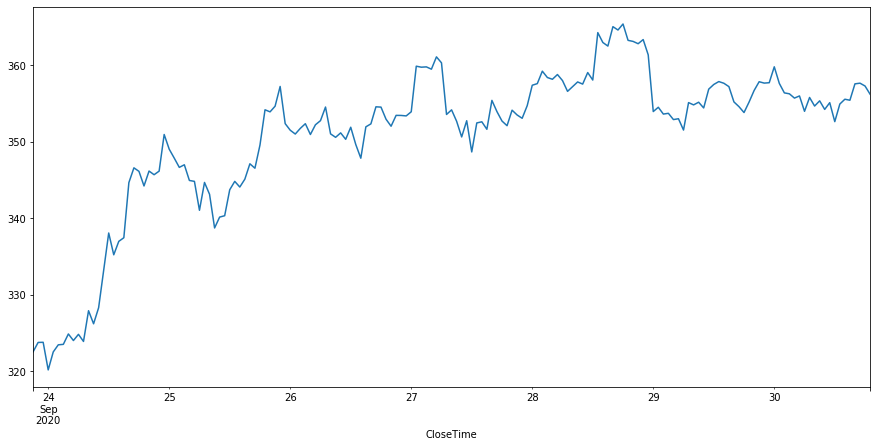

In [19]:
eth['ClosePrice'].plot(figsize=(15, 7))

As you can see, we're able to pull data from the internet with just a few lines, create a DataFrame and plot it all within Jupyter Lab.

In [20]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2020-09-23 21:00:00,327.40,329.24,313.00,322.53,7534.291901,2.417923e+06
2020-09-23 22:00:00,322.95,327.27,320.34,323.76,3417.282971,1.105142e+06
2020-09-23 23:00:00,322.32,323.91,320.90,323.78,4571.068379,1.474166e+06
2020-09-24 00:00:00,323.87,323.87,318.48,320.17,2638.781675,8.464479e+05
2020-09-24 01:00:00,320.58,323.23,316.83,322.52,2302.100948,7.398136e+05


In [21]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

### Bonus: Dynamic plots with Bokeh

We've also included Bokeh as part of this main distribution. Bokeh is a plotting library that generates interactive plots, that can be manipulated right within your browser.

We first need to import the libraries:

In [22]:
output_notebook()

Loading BokehJS ...

And we generate the plot:

In [23]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

# Part 4: Exporting to Excel

We're now ready to generate an Excel file from the downloaded prices. Working with Excel and other formats (like CSV or JSON) is extremely simple in Jupyter Lab (thanks to pandas and Python). Our first step will be to create an "Excel writer", a component from the pandas package:

In [43]:
!pip install openpyxl

In [38]:
writer = pd.ExcelWriter('cryptos.xlsx')

We'll now write both our Bitcoin and Ether data as separate sheets:

In [39]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [40]:
eth.to_excel(writer, sheet_name='Ether')

And finally, we can save the file:

In [41]:
writer.save()